In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nbody import Particles, NbodySimulation

In [101]:
time          = 0    # the starting  time
num_particles = 100 # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)
particles = Particles(N=num_particles)

In [102]:
particles.set_masses(masses=masses)
particles.set_positions(positions=positions)
particles.set_velocities(velocities=velocities)
particles.set_accelerations(accelerations=accelerations)
particles.set_tags(tags=tags)
#把數據傳到class

In [103]:
tags_check    = particles.get_tags()
masses        = particles.get_masses()
positions     = particles.get_positions()
velocities    = particles.get_velocities()
accelerations = particles.get_accelerations()
#check class getter
# print(tags_check==tags)
particles.output(fn="data_particles.txt",time=time)
t,m,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt("data_particles.txt")

In [104]:

def initial_NormalDistribution(N=100,total_mass = 20):
    particles = Particles (N=N)

    masses = particles.get_masses()
    mass = total_mass/particles.nparticles

    positions = particles.get_positions()
    np.random.seed(0)
    positions = np.random.randn(N,3)

    velocities = particles.get_velocities()
    np.random.seed(0)
    velocities = np.random.randn(N,3)
    
    accelerations = particles.get_accelerations()
    np.random.seed(0)
    accelerations = np.random.randn(N,3)

    particles.set_masses((masses*mass))
    particles.set_positions(positions)
    particles.set_velocities(velocities)
    particles.set_accelerations(accelerations)
    return particles

In [105]:
# particles_cloud = initial_NormalDistribution(N=100)
# positions = particles_cloud.get_positions() 
# fig = plt.figure(1)
# ax = fig.gca(projection='3d')
# ax.scatter(positions[:,0],positions[:,1],positions[:,2])

In [106]:
problem_name = "Nbody_simulation"
G      =  6.67e-8 # cgs

In [107]:
particles = Particles(N=100)
particles = initial_NormalDistribution(N=100,total_mass = 20)
sim = NbodySimulation(particles)
sim.setup(G=G,method="RK2",io_freq=10,io_title=problem_name,io_screen=False,visualized=False)
sim.evolve(dt=0.01,tmax=10)

Done!


In [108]:
import glob

In [109]:
fns = "data_"+problem_name+"/data_"+problem_name+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()
#print(fns) 

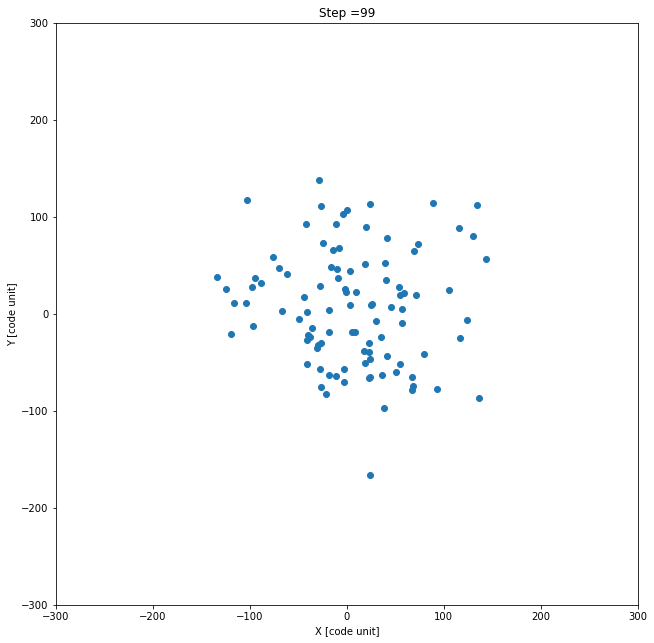

In [110]:
scale = 3 

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
line, = ax.plot([],[],'o')

def init():
    ax.set_xlim(-100*scale,100*scale)
    ax.set_ylim(-100*scale,100*scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    #print("loadtxt done",fn)
    line.set_data(x,y)
    plt.title("Step ="+str(frame))
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)

In [113]:
masses        = particles.get_masses()
positions     = particles.get_positions()
velocities    = particles.get_velocities()
accelerations = particles.get_accelerations()
N = 100
t = sim.time
print(t)

# print(velocities[2,2])
# print(velocities[2,2]**2)
# print(np.sum(velocities[1,:]**2))



for i in range(N):
    vel_vel=np.sum(velocities**2,axis=1)
print(len(vel_vel))
print(len(masses))

Ek = np.zeros(N)
for i in range(N):
    Ek[i] = 0.5*masses[i]*vel_vel[i]
print(np.sum(Ek))



# print(np.sum(Ek))
# for i in range(npts):
#             for j in range(npts):
#                 if(j>i):
#                     x = (posx[i] - posx[j])
#                     y = (posy[i] - posy[j])
#                     z = (posz[i] - posz[j])
#                     rsq = x**2 + y**2 + z**2
#                     req = np.sqrt(x**2+y**2)
#                     force = -G*mass[i,0]*mass[j,0]/(rsq+rsoft)
#                     theta = np.arctan2(y,x)
#                     phi = np.arctan2(z,req)
#                     fx = force*np.cos(theta)*np.cos(phi)
#                     fy = force*np.sin(theta)*np.cos(phi)
#                     fz = force*np.sin(phi)

#                     acc[i,0] += fx/mass[i,0]
#                     acc[i,1] += fy/mass[i,0]
#                     acc[i,2] += fz/mass[i,0]

#                     acc[j,0] -= fx/mass[j,0]
#                     acc[j,1] -= fy/mass[j,0]
#                     acc[j,2] -= fz/mass[j,0]

0.0
100
100
3637.7169334974183
